# Toy example

## Generate two-dimensional Gaussian random vector

In [1]:
import sklearn.mixture as mixture
import numpy as np
import librosa
import pdb
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as cm

In [5]:
def generate_examples(n_mixture, n_samples=300):
    toy_data = []
    for i in range(n_mixture):
        var = np.random.uniform(0,10,2)
        mu = np.random.uniform(-40,40,2)
        dist = np.random.normal(mu, var, (n_samples,2))
        toy_data.append(dist)
        print("var {0}".format(var))
    toy_data = np.vstack(toy_data)
    return toy_data

In [7]:
def define_GMM(n_mixture):
    #sk learn에서 정의되어 있는 mixture
    return mixture.GaussianMixture(n_components=n_mixture, covariance_type='diag') #full

In [8]:
def plot_distribution(model,X_train):
    x = np.linspace(-100.,100.)
    y = np.linspace(-100.,100.) #간격을 나눠주고
    X,Y = np.meshgrid(x,y) # mesh로 그림을 그리고
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = model.score_samples(XX)
    Z = Z.reshape(X.shape)
    CS = plt.contour(X, Y, -np.log10(-Z),antialiased=False) #contour 그래프
    CB = plt.colorbar(CS)
    plt.scatter(X_train[:, 0], X_train[:, 1], .8)
    plt.title('Negative log-likelihood predicted by a GMM')
    plt.axis('tight')
    plt.show()
    plt.close()
    
    fig = plt.gca(projection='3d')
    surf = fig.plot_surface(X, Y, -np.log10(-Z), cmap='coolwarm', linewidth=0,antialiased=False)
    plt.colorbar(surf)
    plt.title('3D contour of GMM')
    fig.set_xlabel('x')
    fig.set_ylabel('y')
    fig.set_zlabel('z')
    plt.show()
    plt.close()

In [10]:
n_mixture = 2
toy_data=generate_examples(n_mixture)
gmm_model = define_GMM(n_mixture)

var [3.16510979 1.24119148]
var [3.93936838 3.84255258]


In [11]:
gmm_model.fit(toy_data) #GMM의 평균과 코베리언스가 나타남

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

var [8.93814726 9.7299373 ]
var [9.99682983 1.50385227]


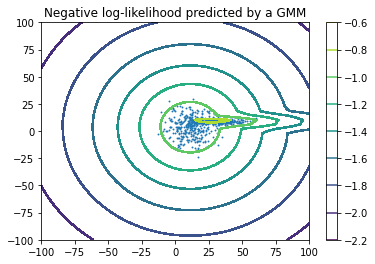

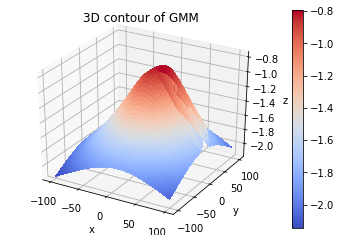

In [9]:
plot_distribution(gmm_model, toy_data)